In [1]:
import pandas as pd
df = pd.read_csv('cleaned_data_onlyqcut.csv')

In [2]:
x = df.drop(['churn'], axis = 1)
y = df['churn']

In [3]:
#Chia tập train, test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)

# Bước 4: Xây dựng mô hình

<sử dụng các mô hình có sẵn trong các thư viện như sklearn, xgboost, lightgbm,.. để thực train các mô hình dự báo. Sau đó sử dụng các metric để tính toán các chỉ số đánh giá mô hình: ví dụ như sử dụng
classification_report để đánh giá mô hình phân loại>

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='linear', random_state=42)

# Huấn luyện mô hình
svm_model.fit(x_train, y_train)

# Dự đoán trên tập test
y_pred = svm_model.predict(x_test)

# Đánh giá hiệu năng mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.792
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      1607
           1       0.32      0.05      0.09       393

    accuracy                           0.79      2000
   macro avg       0.57      0.51      0.49      2000
weighted avg       0.71      0.79      0.73      2000



In [67]:
dict = {
    'n_estimators': [10, 20, 30],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#Model tuning: nói rõ các tham số cần tìm, cách thực hiện
grid = GridSearchCV(RandomForestClassifier(), dict, cv = 5)
grid.fit(x_train, y_train)
print(grid.best_params_)

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 20}


In [68]:
grid_params = grid.best_params_

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



<Axes: >

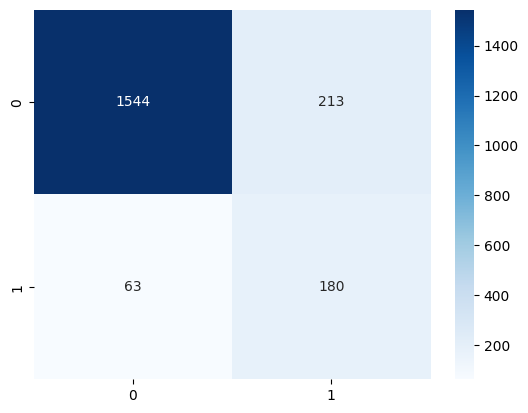

In [69]:
rf_grid = RandomForestClassifier(max_depth = grid_params['max_depth'], min_samples_leaf = grid_params['min_samples_leaf'], min_samples_split = grid_params['min_samples_split'], n_estimators = grid_params['n_estimators'])
rf_grid.fit(x_train, y_train)
y_pred = rf_grid.predict(x_test)
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(y_pred, y_test)
sns.heatmap(cf, annot = True, cmap = 'Blues', fmt = 'g')


# Bước 5: Tối ưu sai số bằng các kỹ thuật ensemble learning (nếu cần)

< khi sử dụng các mô hình riêng lẻ ở bước 4 nếu ra các kết quả dự báo k có sai số như mong muốn. Thường sẽ sử dụng các mô hình ensemble learning như bagging, boosting,... để cải thiện các kết quả dự báo>

In [70]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 100)
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)
print(classification_report(y_test, y_pred))

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.68      0.49      0.57       393

    accuracy                           0.86      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.86      0.85      2000



Sau khi cải thiện ta thấy các chỉ số đánh giá lớp 1 rất thấp. Vì thế:

# Bước 6: Tối ưu mô hình bằng cách xử lý mất cân bằng dữ liệu 

<Khi yêu cầu doanh nghiệp ưu tiên các chỉ số dự báo phải đi kèm với 1 mức độ rủi ro nào đó nhất định tùy nơi, chúng ta thường phải tối ưu lại dữ liệu tập train bằng cách sử dụng các thuật toán xử lý mất cân bằng dữ liệu nhưu SMOTE, Tomek Links, SMOTE + Tomek Links,... để tối ưu lại chỉ số mong muốn>

In [5]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
xy_train_sm = pd.concat([x_train_sm, y_train_sm], axis = 1)


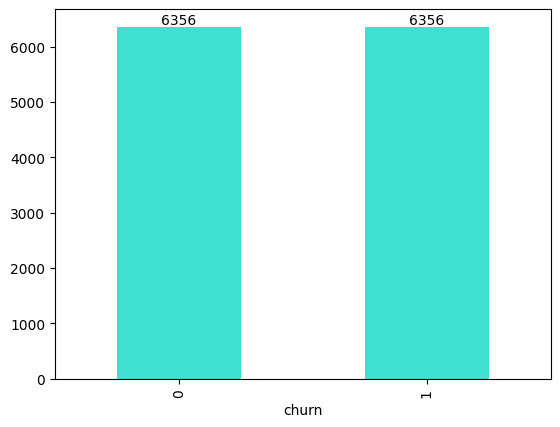

In [6]:
xy = xy_train_sm['churn'].value_counts().plot(kind = 'bar', color = 'turquoise')
for container in xy.containers:
  xy.bar_label(container)

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='linear', random_state=42)

# Huấn luyện mô hình
svm_model.fit(x_train_sm, y_train_sm)

# Dự đoán trên tập test
y_pred = svm_model.predict(x_test)

# Đánh giá hiệu năng mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6785
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77      1607
           1       0.35      0.72      0.47       393

    accuracy                           0.68      2000
   macro avg       0.63      0.69      0.62      2000
weighted avg       0.80      0.68      0.71      2000



In [73]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(estimator = rf_grid, n_estimators = 100)
ada.fit(x_train_sm, y_train_sm)
y_pred = ada.predict(x_test)
print(classification_report(y_test, y_pred))

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.66      0.51      0.57       393

    accuracy                           0.85      2000
   macro avg       0.77      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



# Explainability and SHAP Analysis

In [74]:
import shap

In [75]:
explainer = shap.Explainer(rf_grid)
shap_values = explainer(x_test)


In [76]:
shap_values.shape

(2000, 15, 2)

In [77]:
shap_values_class_1 = shap_values[:, :, 1]

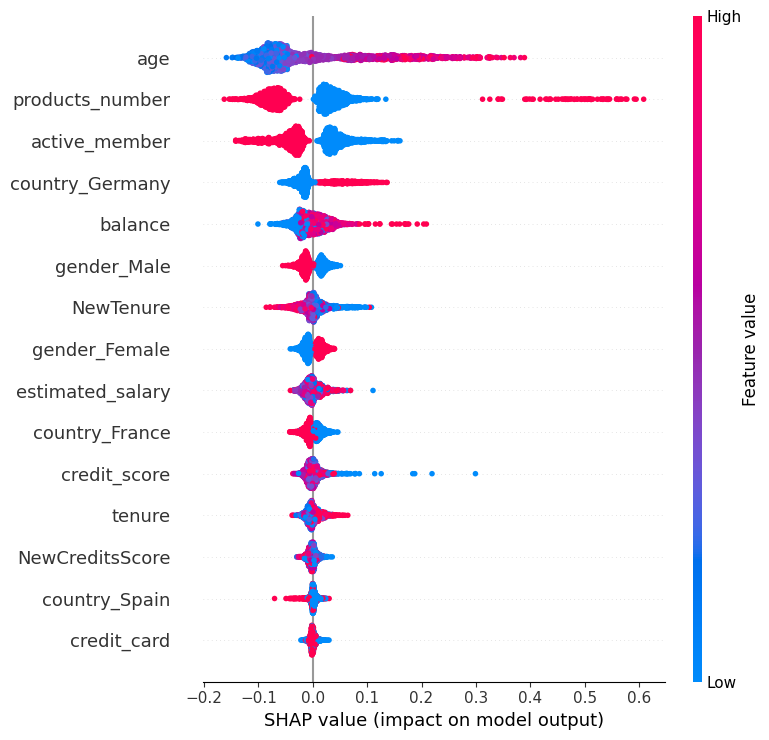

In [78]:
# Summary plot for the positive class
shap.summary_plot(shap_values_class_1, x_test, plot_type="dot", title="SHAP Summary Plot for Positive Class")


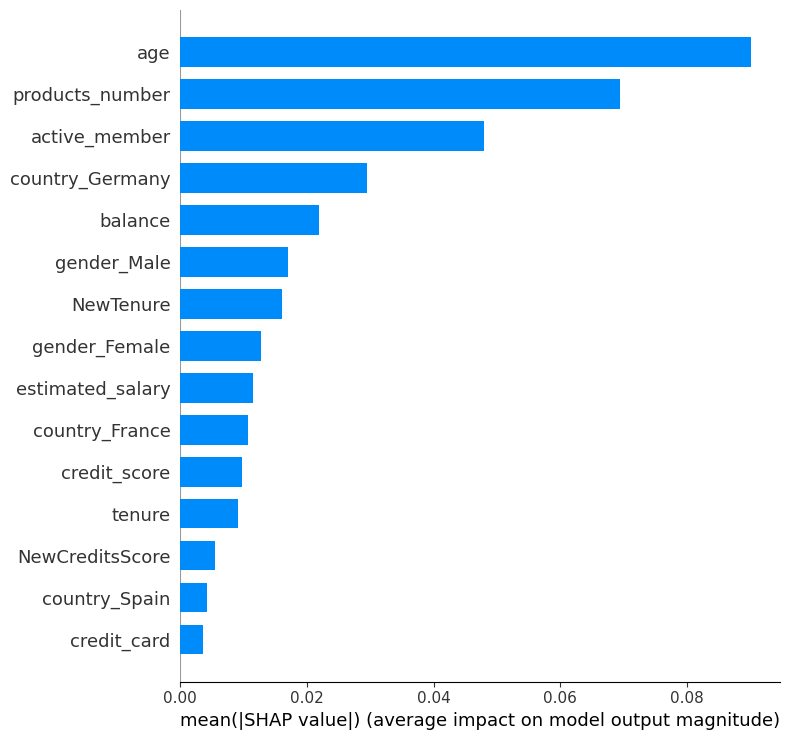

In [79]:
# Bar plot for the positive class
shap.summary_plot(shap_values_class_1, x_test, plot_type="bar", title="SHAP Bar Plot for Positive Class")
